>
# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> In this project I will analyze TMDb data set in order to obtain useful information and answer questions about it, and in particular I will analyze the factors that affect on a movie's average vote. This data set contains information for about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.


### Question(s) for Analysis
#### 1) Does the High Budget Affect the Movie's Vote Average?
#### 2) Does the High Popularity Affect the Movie's Vote Average?
#### 3) Does the High Revenue Affect the Movie's Vote Average?


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties
>In this step I will inspect this data set and perform some functions on it to get meaningful information like: dimensions, description, number of entries, some of null values, some of unique values & data types.

### Reading Data:

In [40]:
df = pd.read_csv("tmdb-movies.csv")

### Taking a look at the first 3 rows:

In [41]:
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


Data set's columns are clearly shown with their data.

### Data Set Dimensions:

In [42]:
df.shape

(10866, 21)

10866 x 21

### Obtaining Some Characteristics:

In [43]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


This shows important values like mean, std and other statistics.

### Columns Info:

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

The number of entries are 10866, and each column is shown with its non-null value.

### Sum of Null values in each Column:

In [45]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Some columns have more than 2000 null values which is a large range.

### Number of Unique Values for each Column:

In [46]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

This shows that most columns have almost unique entries for each tuple and others mostly have repeated values like: vote average & release year.

### Columns' Data Types:

In [47]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

Data types here are: int, float & string.   


### Data Cleaning
>In this step I will clean the data set by performing the operations below: replacing zeroes with null, dropping unnecessary columns, dropping rows with null values, dropping duplicates & changing release date to standard date/time.
 

#### Dropping Columns that Have Null Values and Won't Be Used:

In [48]:
df.drop(["homepage","tagline","keywords","production_companies"], axis=1, inplace= True)

In [49]:
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


"homepage", "tagline", "keywords" & "production_companies" columns are dropped.

#### Replace Zeroes:

In [50]:
replace_zeroes=['budget', 'revenue','budget_adj','revenue_adj']

df[replace_zeroes] = df[replace_zeroes].replace(0, np.NAN)

Replacing zeroes with nan to be prepared for the coming steps.

#### Dropping Rows with Null Values:

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 17 columns):
id                10866 non-null int64
imdb_id           10856 non-null object
popularity        10866 non-null float64
budget            5170 non-null float64
revenue           4850 non-null float64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
overview          10862 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        5170 non-null float64
revenue_adj       4850 non-null float64
dtypes: float64(6), int64(4), object(7)
memory usage: 1.4+ MB


In [52]:
df.dropna(inplace = True)


Null values are dropped.

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3850 entries, 0 to 10848
Data columns (total 17 columns):
id                3850 non-null int64
imdb_id           3850 non-null object
popularity        3850 non-null float64
budget            3850 non-null float64
revenue           3850 non-null float64
original_title    3850 non-null object
cast              3850 non-null object
director          3850 non-null object
overview          3850 non-null object
runtime           3850 non-null int64
genres            3850 non-null object
release_date      3850 non-null object
vote_count        3850 non-null int64
vote_average      3850 non-null float64
release_year      3850 non-null int64
budget_adj        3850 non-null float64
revenue_adj       3850 non-null float64
dtypes: float64(6), int64(4), object(7)
memory usage: 541.4+ KB


Now, each column has 3850 non_null entry.

#### Checking the Dimensions:

In [54]:
df.shape

(3850, 17)

New dimensions.

#### Checking Duplicates:

In [55]:
df.duplicated().sum()

1

Sum of duplicates = 1

In [56]:
df.drop_duplicates(inplace= True)

The duplicate value is dropped.

#### Double checking the Null Values:

In [57]:
df.isnull().any()

id                False
imdb_id           False
popularity        False
budget            False
revenue           False
original_title    False
cast              False
director          False
overview          False
runtime           False
genres            False
release_date      False
vote_count        False
vote_average      False
release_year      False
budget_adj        False
revenue_adj       False
dtype: bool

No null values are there anymore.

#### Changing Release Date Format:

In [58]:
df["release_date"] = pd.to_datetime(df['release_date'])
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


Release date datatype is changed to standard date/time format.

<a id='eda'></a>
## Exploratory Data Analysis

> In this step, further statistics will be made on the data set that will help us in answering the above questions.


#### Features Histograms:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f582c2e15f8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f58306c5c88>]], dtype=object)

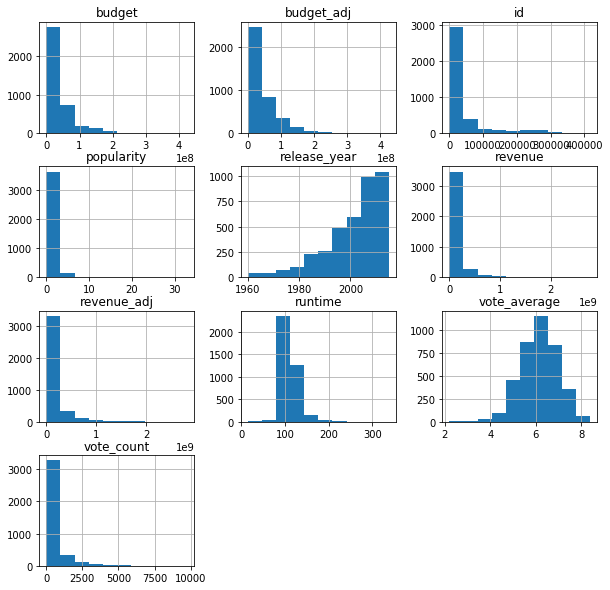

In [59]:
df.hist(figsize=(10,10))

Vote average has a normal distribution, release year is left skewed while the rest features are right skewed.

### Research Question 1: Does the High Budget Affect the Movie's Vote Average?

#### Checking the Correlation Between Budget & Vote Average:

Text(0,0.5,'Vote Average')

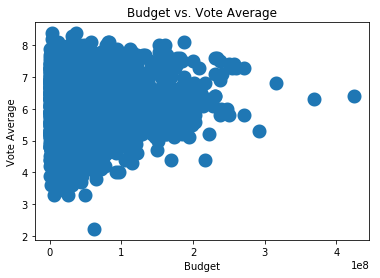

In [60]:
plt.scatter(df["budget_adj"],df["vote_average"], linewidth=8)
plt.title("Budget vs. Vote Average")
plt.xlabel("Budget")
plt.ylabel("Vote Average")

Strong correlation is found between budget & vote average.

#### Visualizing the Vote Average at Low & High Budget: 

In [61]:
middle_budg = df["budget_adj"].median()
middle_budg

30050304.209246196

In [62]:
low_budg = df.query("budget_adj < 30050304")
high_budg = df.query("budget_adj >= 30050304 ")

low_mean_vote_1 = low_budg["vote_average"].mean()
high_mean_vote_1 = high_budg["vote_average"].mean()
print(low_mean_vote_1,high_mean_vote_1)

6.17796257796 6.15942857143


#### Creating a Bar Plot with the Values:

Text(0,0.5,'Vote Average')

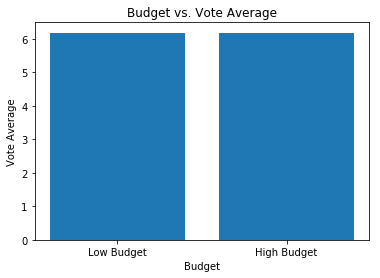

In [63]:
labels= ["Low Budget","High Budget"]
heights= [low_mean_vote_1,high_mean_vote_1]
locations= [1,2]
plt.bar(locations, heights, tick_label=labels )
plt.title("Budget vs. Vote Average")
plt.xlabel("Budget")
plt.ylabel("Vote Average")

Low budget average vote mean is higher than the high budget one.

### Research Question 2: Does the High Popularity Affect the Movie's Vote Average?

#### Checking the Correlation Between Popularity & Vote Average:

Text(0,0.5,'Vote Average')

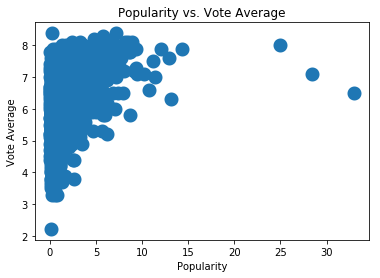

In [64]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
plt.scatter(df["popularity"],df["vote_average"], linewidth=8)
plt.title("Popularity vs. Vote Average")
plt.xlabel("Popularity")
plt.ylabel("Vote Average")

Correlation is found between popularity & vote average.

#### Visualizing the Vote Average at Low & High Popularity: 

In [65]:
middle_pop = df["popularity"].median()
middle_pop

0.79858200000000001

In [66]:
low_pop = df.query("popularity < 0.79858200000000001")
high_pop = df.query("popularity >= 0.79858200000000001 ")

low_mean_vote_2 = low_pop["vote_average"].mean()
high_mean_vote_2 = high_pop["vote_average"].mean()
print(low_mean_vote_2,high_mean_vote_2)

5.95878378378 6.37849350649


#### Creating a Bar Plot with the Values:

Text(0,0.5,'Vote Average')

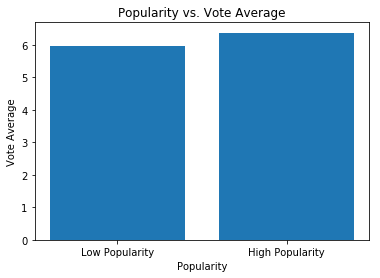

In [67]:
labels= ["Low Popularity","High Popularity"]
heights= [low_mean_vote_2,high_mean_vote_2]
locations= [1,2]
plt.bar(locations, heights, tick_label=labels )
plt.title("Popularity vs. Vote Average")
plt.xlabel("Popularity")
plt.ylabel("Vote Average")

High popularity has higher vote average mean than the low popularity.

### Research Question 3: Does the Revenue Affect the Movie's Vote Average?

#### Checking the Correlation Between Revenue & Vote Average:

Text(0,0.5,'Vote Average')

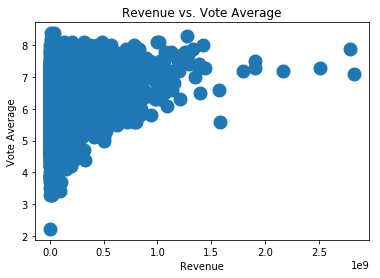

In [68]:
plt.scatter(df["revenue_adj"],df["vote_average"], linewidth=8)
plt.title("Revenue vs. Vote Average")
plt.xlabel("Revenue")
plt.ylabel("Vote Average")

Revenue and vote average are positively correlated.

#### Visualizing the Vote Average at Low & High Revenue: 

In [69]:
middle_rev = df["revenue_adj"].median()
middle_rev

61813934.329077892

In [70]:
low_rev = df.query("revenue_adj < 61813934.329077892")
high_rev = df.query("revenue_adj >= 61813934.329077892 ")

low_mean_vote_3 = low_rev["vote_average"].mean()
high_mean_vote_3 = high_rev["vote_average"].mean()
print(low_mean_vote_3,high_mean_vote_3)

6.01361746362 6.32368831169


#### Creating a Bar Plot with the Values:

Text(0,0.5,'Vote Average')

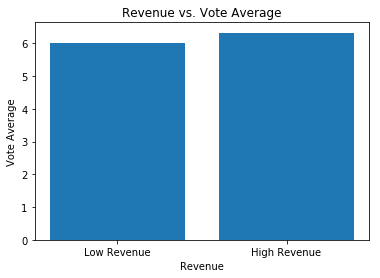

In [71]:
labels= ["Low Revenue","High Revenue"]
heights= [low_mean_vote_3,high_mean_vote_3]
locations= [1,2]
plt.bar(locations, heights, tick_label=labels )
plt.title("Revenue vs. Vote Average")
plt.xlabel("Revenue")
plt.ylabel("Vote Average")

High revenue has more vote average mean than that of the low revenue.

<a id='conclusions'></a>
## Conclusions

>In this project I started the analysis by finding out the features that mostly affect the average vote of movies, which is a very important indication of movies' success. I found a correlation between average vote and (popularity, revenue & budget). Average vote and budget are inversely proportional as illustrated in the bar plot, while average vote is positively correlated with revenue and popularity. 

### Limitations
>The data set contained many columns that have lots of missing values and zeroes and some of them couldn't be replaced so dropping them wasn't the best approach. Also, voting was analyzed with other features by using their median which isn't the best way for categorizing a movie.


In [72]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0